In [ ]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/drive')

datapath = '/content/drive/My Drive/Colab Notebooks/'
os.path.exists(datapath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


True

In [ ]:
# Loading the Wisconsin Diagonistic Breast Cancer dataset
data = pd.read_csv(datapath + "breast-cancer-wisconsin.csv")
data.describe()

,sample_code_number,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
# Locating rows without missing data
cancer_data = data.loc[data["bare_nuclei"] != "?"]

# Using these columns to test cancer cells
clump_thickness = cancer_data["clump_thickness"]
cell_size_uniformity = cancer_data["cell_size_uniformity"]

x_axis = []
y_axis = []

# Setting up x_axis values
for x in clump_thickness:
  x_axis.append(x)

# Setting up y_axis values
for x in cell_size_uniformity:
  y_axis.append(x)

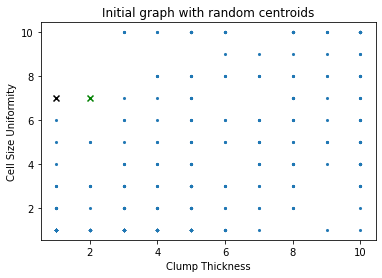

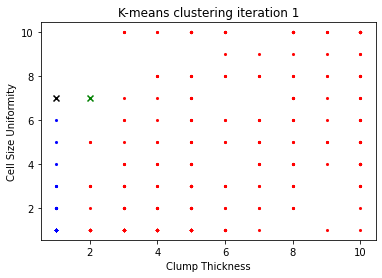

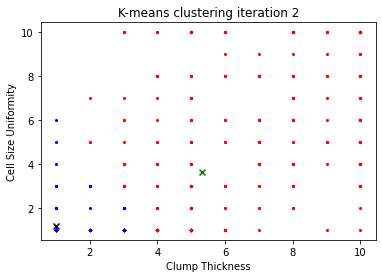

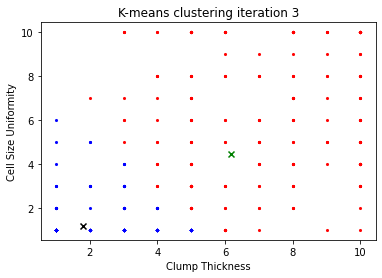

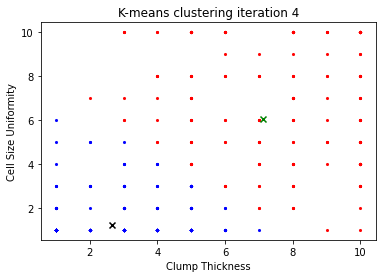

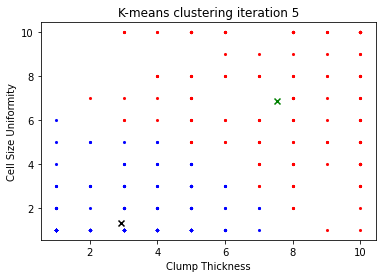

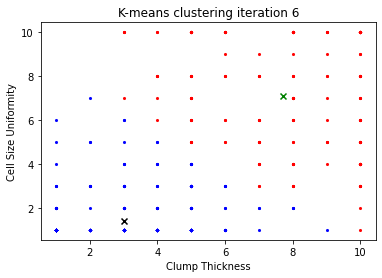

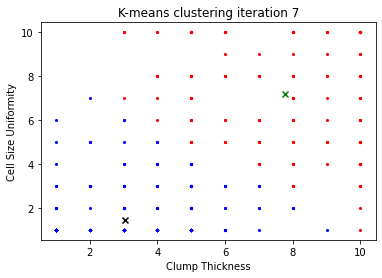

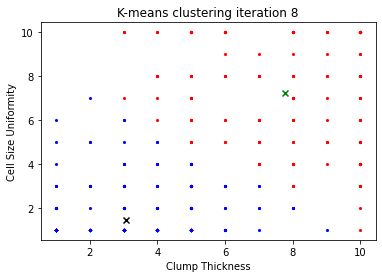

In [ ]:
# Implementing a function that performs K-means clustering from scratch
# Randomly choose k cluser center locations (centroids)
# Link to finding random numbers
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

# Randomly assigning the centroids
k1 = [np.random.randint(1, 10), np.random.randint(1, 10)]
k2 = [np.random.randint(1, 10), np.random.randint(1, 10)]

# Plotting the initial graph with the two centroids on it
plt.scatter(x=x_axis, y=y_axis, linewidths=.1, marker=".")
plt.scatter(x=k1[0], y=k1[1], marker="x", linewidths=10, c = "Black")
plt.scatter(x=k2[0], y=k2[1], marker="x", linewidths=10, c = "Green")
plt.xlabel("Clump Thickness")
plt.ylabel("Cell Size Uniformity")
plt.title("Initial graph with random centroids")
plt.show()

# Setting up previous values to check stopping criteria
previous_close_x1 = []
previous_close_y1 = []
previous_close_x2 = []
previous_close_y2 = []
previous_k1 = 0
previous_k2 = 0
done = False
iteration = 0

# While the stopping criteria is not met the algorithm continues to run
while(done == False):
  class_order = []
  close_x1 = []
  close_y1 = []
  close_x2 = []
  close_y2 = []
  iteration += 1

  # Looping until convergence
  # Link to finding the shortest distance between two points
  # https://www.mathsisfun.com/algebra/distance-2-points.html
  for x in range(0, len(x_axis)):
      first = np.sqrt(np.square(x_axis[x] - k1[0]) + np.square(y_axis[x] - k1[1]))
      second = np.sqrt(np.square(x_axis[x] - k2[0]) + np.square(y_axis[x] - k2[1]))
      if(first < second):
        close_x1.append(x_axis[x])
        close_y1.append(y_axis[x])                                                     
        plt.scatter(x_axis[x], y_axis[x], marker = ".", c = "Blue", linewidths=.1)
        class_order.append(4)
      if(first >= second):
        close_x2.append(x_axis[x])
        close_y2.append(y_axis[x])     
        plt.scatter(x_axis[x], y_axis[x], marker = ".", c = "Red", linewidths=.1)
        class_order.append(2)

  # Adding the current centroids to the scatter plot
  plt.scatter(x=k1[0], y=k1[1], marker="x", linewidths=10, c = "Black")
  plt.scatter(x=k2[0], y=k2[1], marker="x", linewidths=10, c = "Green")
  plt.xlabel("Clump Thickness")
  plt.ylabel("Cell Size Uniformity")
  plt.title("K-means clustering iteration " + str(iteration))
  plt.show()
  
  # Finding the location of the new centroid
  # Link to finding the mean with Numpy
  # https://numpy.org/doc/stable/reference/generated/numpy.mean.html
  k1 = [np.mean(close_x1), np.mean(close_y1)]
  k2 = [np.mean(close_x2),np.mean(close_y2)]

  # Stopping if the clusters do not change
  if(previous_close_x1 == close_x1 or previous_close_y1 == close_y1):
    done = True
  else:
    previous_close_x1 = close_x1
    previous_close_y1 = close_y1
  if(previous_close_x2 == close_x2 or previous_close_y2 == close_y2):
    done = True
  else:
    previous_close_x2 = close_x2
    previous_close_y2 = close_y2
  
  # Stopping if the location of the centroids does not change
  if(previous_k1 == k1 or previous_k2 == k2):
    done = True

  # Setting the previous values after the first iteration
  if(previous_close_x1 == [] or previous_close_y1 == []):
    previous_close_x1 = close_x1
    previous_close_y1 = close_y1
  if(previous_close_x2 == [] or previous_close_y2 == []):
    previous_close_x2 = close_x2
    previous_close_y2 = close_y2
  if(previous_k1 == 0 or previous_k2 == 0):
    previous_k1 = k1
    previous_k2 = k2

0.9267935578330893


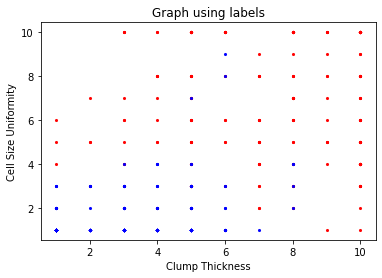

In [ ]:
# Graphing with the class labels
malignant = cancer_data.loc[cancer_data["class"] == 4];
benign = cancer_data.loc[cancer_data["class"] == 2];

malignant_x = malignant["clump_thickness"]
malignant_y = malignant["cell_size_uniformity"]
benign_x = benign["clump_thickness"]
benign_y = benign["cell_size_uniformity"]

plt.scatter(x = malignant_x, y = malignant_y, marker = ".", c = "Red", linewidths=.1)
plt.scatter(x = benign_x, y = benign_y, marker = ".", c = "Blue", linewidths=.1)
plt.xlabel("Clump Thickness")
plt.ylabel("Cell Size Uniformity")
plt.title("Graph using labels")

# Determining the accuracy of the algorithm
cancer_class = cancer_data["class"]
count = 0
accuracy = 0
cancer_class_order = []
for x in cancer_class:
  cancer_class_order.append(x)
for x in range(0, len(cancer_class_order)):
  if(class_order[count] == cancer_class_order[x]):
    accuracy += 1
  count += 1

# Determining which cluster goes with which cancer type for accuracy
if((accuracy/len(cancer_class_order)) < .1):
  print(1 - (accuracy/len(cancer_class_order)))
else:
  print(accuracy/len(cancer_class_order))

# Then compare with the class labels, what is the accuracy

The accuracy of the algorithm compared to knowing the labels is 92.68%. 

Since the algorithm is unsupervised, the two clusters could switch locations and we have to look at the cancer class they go to.

# Run the algorithm several times, starting with different centers

The only change that happens when running this algorithm several times is that the two centroids can switch locations. 

This means that we have to check the csv file containing the data and see which category the cluster falls into. Whether it is malignant or benign.

In [ ]:
# Setting up a supervised method using support vector machines
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Dropping the target variable and setting up the training and testing data
data_features = cancer_data.drop("class", axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    data_features, cancer_data["class"], random_state=0)

# Creating a pipeline to define out strategy and a scaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

# Creating an array of the categorical variables that will be used
cat_attr = ["clump_thickness", "cell_size_uniformity", "cell_shape_uniformity", "marginal_adhesion", "single_epithelial_cell_size", 
            "bare_nuclei", "bland_chromatin", "normal_nucleoli", "mitoses"]

# Set up a ColumnTransformer for the pipeline
pipeline = ColumnTransformer([
        ("cat_pipeline", OneHotEncoder(), cat_attr),
    ])

# Having the pipeline fit to the x_train
cancer_data_prep = pipeline.fit_transform(X_train)

In [ ]:
# Checking the disctribution of the prepped 
print(cancer_data_prep.shape)

# Setting up a logistic regression of the data with 500 iterations
logreg = LogisticRegression(max_iter=500)
logreg.fit(cancer_data_prep, y_train)

# Printing out the accuracy of the testing
X_test_trans = pipeline.transform(X_test)
print("Test score: {:.2f}".format(logreg.score(X_test_trans, y_test)))

(512, 89)
Test score: 0.95


In [ ]:
# Link to support vector machines https://scikit-learn.org/stable/modules/svm.html
from sklearn import svm

# Fitting the prepped data to the support vector machines
credit_svm = svm.SVC()
credit_svm.fit(cancer_data_prep, y_train)

# Printing out the predictions using the prepped data
credit_svm.predict(cancer_data_prep)

array([4, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 2, 2,
       2, 4, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2,
       4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2,
       2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2,
       2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,

## Do we get a better result using a supervised method? 

Yes, we can get a supervised method with a testing accuracy of 95% compared to the 92.68% that we got with k-means clustering.